# HW 1
Xizi Wang, Andrew Corum


## Question 1


In [3]:
import pandas
housing = pandas.read_csv('housing_data.csv')
housing[:3]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [4]:
num_samples = len(housing.index)
num_attributes = len(housing.columns)

The housing_data contains altogether 4600 data samples and 18 attributes.
Among the attributes:
**Categorical**: date, bedrooms, bathrooms, floors, waterfront, view, condition, yr_built, yr_renovated, street, city, statezip, country

**Continuous**: price, sqft_living, sqft_lot, sqft_above, sqft_basement, 

In [5]:
# remove the date, street, country columns
del housing['date']
del housing['street']
del housing['country']

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,77
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle,WA 98103
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1573,148
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN


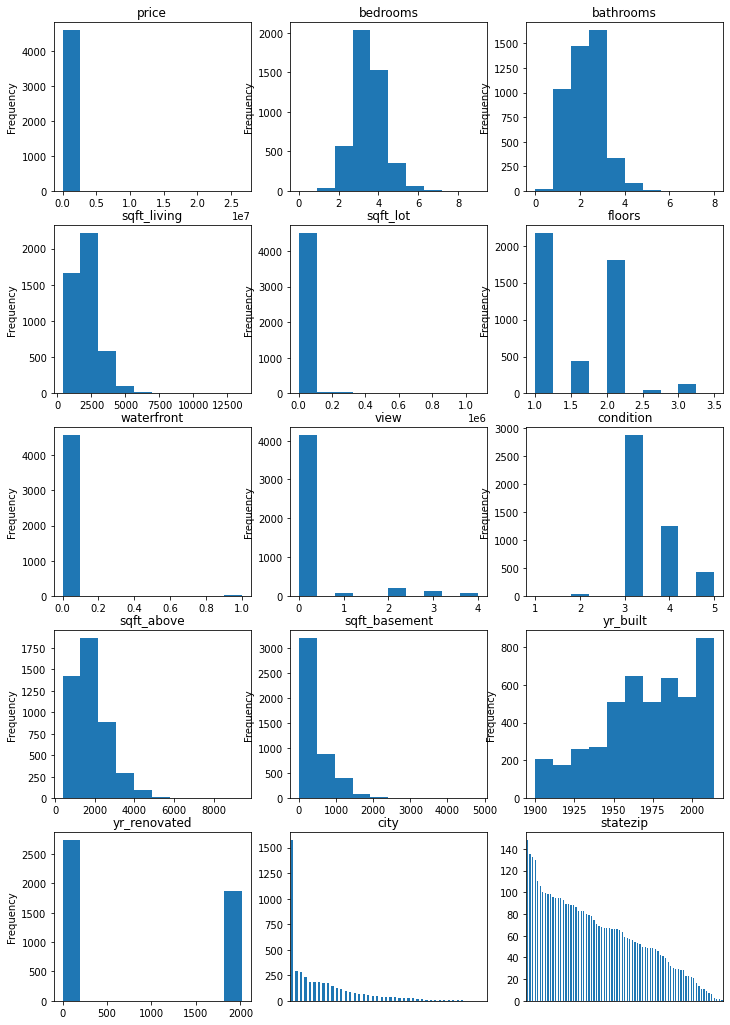

In [6]:
import matplotlib.pyplot as plt

# Histograms of attributes
rows, cols = 5, 3
fig, axis = plt.subplots(figsize=(12,18), nrows=rows, ncols=cols)
for i in range(0,13):
    housing.iloc[:,i].plot(ax=axis[i//3,i%3], title=housing.columns[i], kind='hist')
housing['city'].value_counts().plot(ax=axis[4,1], title='city', kind='bar', xticks=[])
housing['statezip'].value_counts().plot(ax=axis[4,2], title='statezip', kind='bar', xticks=[])

# statistical values of each attribute
housing.describe(include='all')

In [7]:
values = housing.to_numpy()
cols = housing.columns
attr_values = {}
for i in range(values.shape[1]):
    attr_values[cols[i]] = values[:,i].flatten()

In [8]:
'''for key in attr_values.keys():    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(20,10))
    if(key == 'city' or key == 'statezip'):
        plt.xticks(rotation = 45)
    plt.hist(attr_values[key], bins=30)
    plt.gca().set(title="{}".format(key), ylabel='Counts')
    plt.show()''';

Noticeable traits of key continuous attributes is that the distribution of the values of the attribute is similar to that of price, like sqft_living, sqft_lot, sqft_above. 

**yr_renovated** may need special treatment, because it has many zeros (not a normal number for year). So the 0's should be replaced by nan to make it more obvious. Another solution is to replace the 0 values with yr_built, or make this a binary attribute "has been renovated".

**price**: There are houses that have a price of '0', which must be a mistake. If we are using the 'price' attribute in a model, we may need to throw out the 0 rows. There are also a handful of very large outliers that, even if correct, may be tricky to model.

In [9]:
def get_mean(array):
    sum = 0
    num = 0
    for element in array:
        if element == 0:
            continue
        num += 1
        sum += element
    return sum / num, num

def get_median(array):
    n = len(array)
    num_zeros = 0
    for i in range(n): 
        if array[i] == 0:
            num_zeros += 1
        for j in range(0, n-i-1): 
            if array[j] > array[j+1] : 
                array[j], array[j+1] = array[j+1], array[j] 
    array = array[num_zeros:]

    if len(array) % 2 == 1:
        return array[int((len(array)-1)/2)]
    else:
        return (array[int((len(array)-2)/2)] + array[int(len(array)/2)]) / 2.0

In [10]:
import numpy as np
prices = attr_values['price']
    
mean, num_nonzero = get_mean(prices)
median = get_median(prices)

print("funtion:\nmean: {}\nmedian: {}".format(mean, median))
print('\n')

# built-in function results
prices = prices[prices>0]
print("built-in funtion:\nmean: {}\nmedian: {}".format(np.mean(prices), np.median(prices)))

funtion:
mean: 557905.8991379443
median: 464250.0


built-in funtion:
mean: 557905.8991379444
median: 465000.0


In [11]:
house_nonzero = housing.copy()
house_nonzero = house_nonzero[housing.price != 0]
# replaces the zero-priced houses with the median price value from the non-zeropriced houses, using your median function from above
housing_median = housing.copy()
housing_median.loc[housing_median['price'] == 0, 'price'] = median
# replaces the zero-pricedhouses with the mean price value from the non-zero priced houses,  using your mean valuefunction above.
housing_mean = housing.copy()
housing_mean.loc[housing_mean['price'] == 0, 'price'] = mean

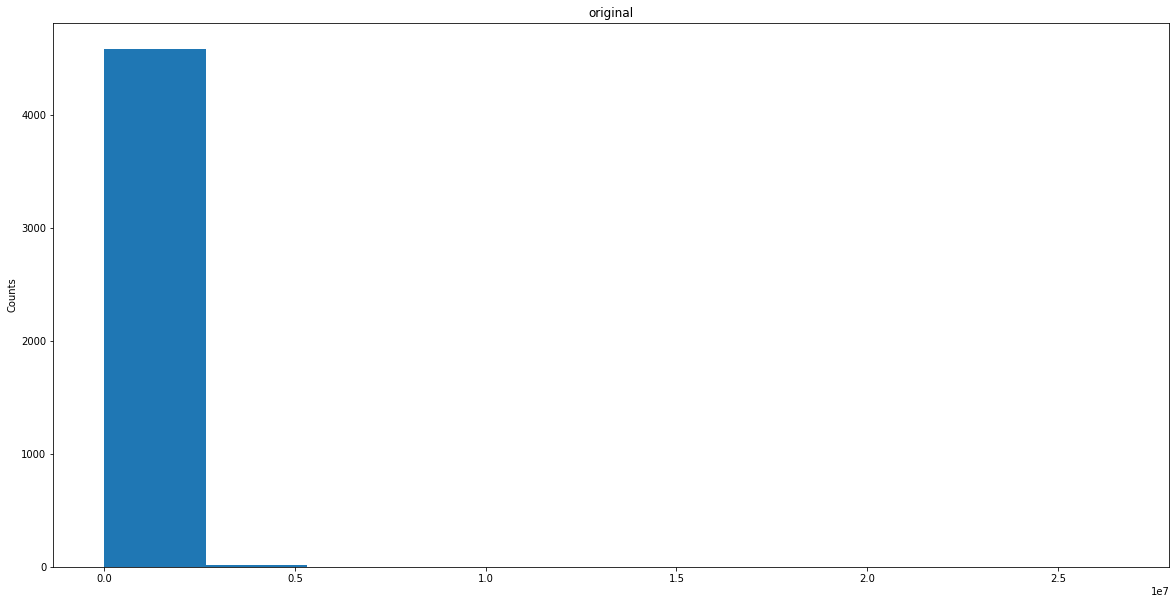

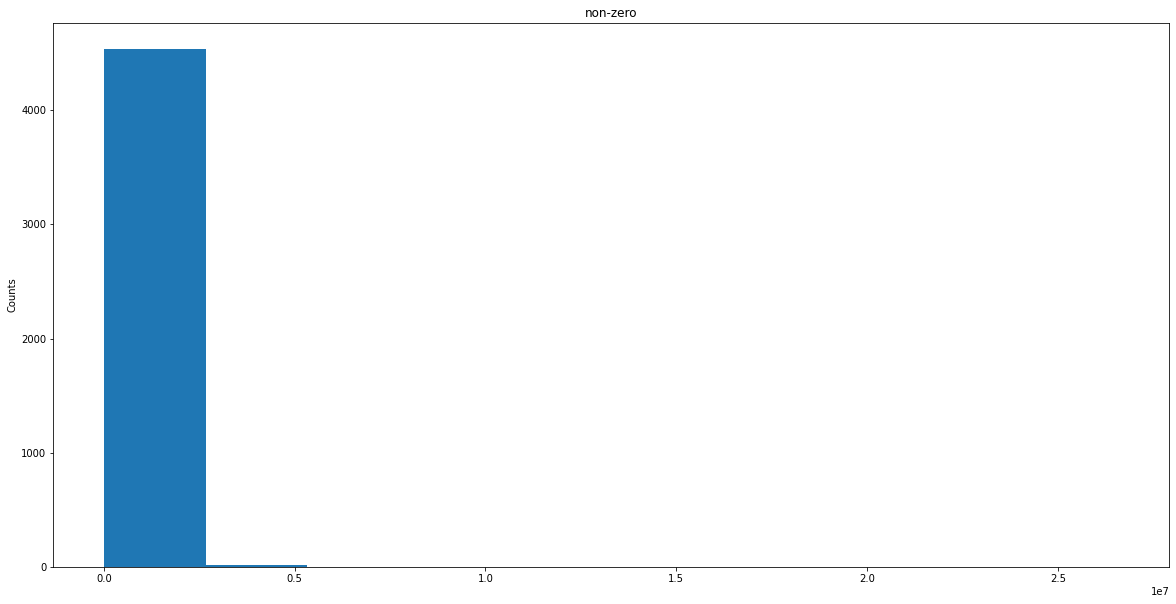

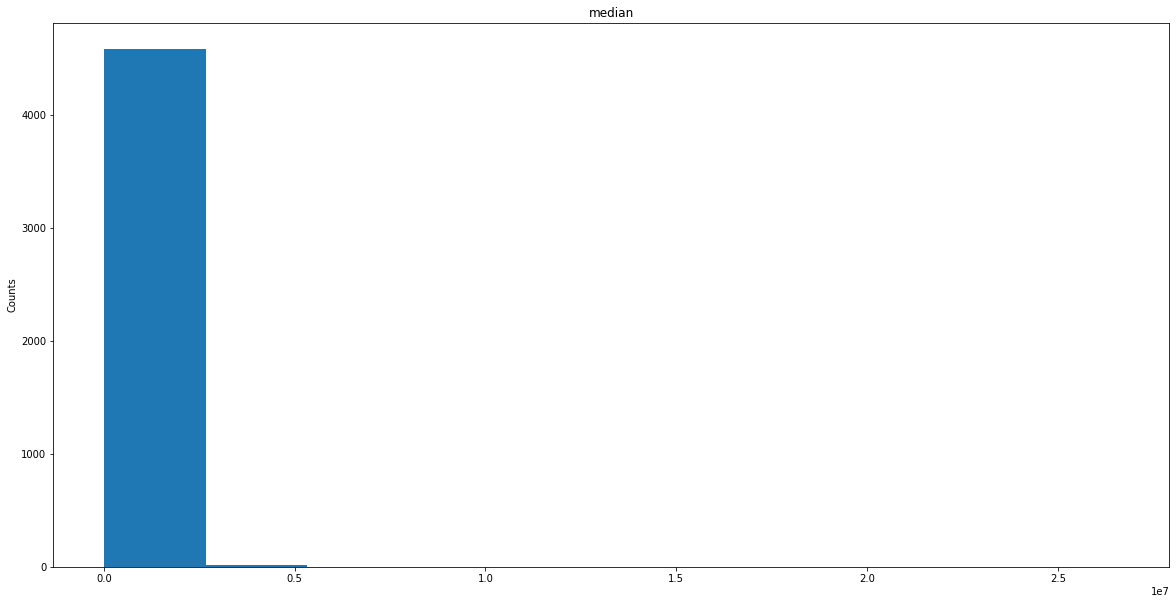

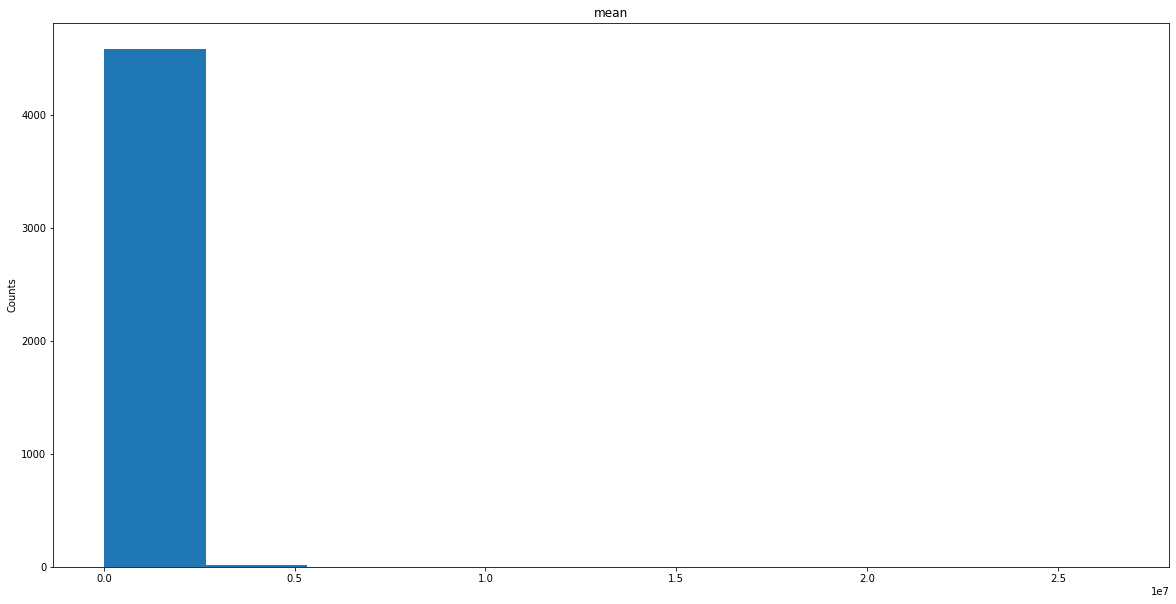

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(housing.price)
plt.gca().set(title="{}".format('original'), ylabel='Counts')
plt.show()
plt.figure(figsize=(20,10))
plt.hist(house_nonzero.price)
plt.gca().set(title="{}".format('non-zero'), ylabel='Counts')
plt.show()
plt.figure(figsize=(20,10))
plt.hist(housing_median.price)
plt.gca().set(title="{}".format('median'), ylabel='Counts')
plt.show()
plt.figure(figsize=(20,10))
plt.hist(housing_mean.price)
plt.gca().set(title="{}".format('mean'), ylabel='Counts')
plt.show()

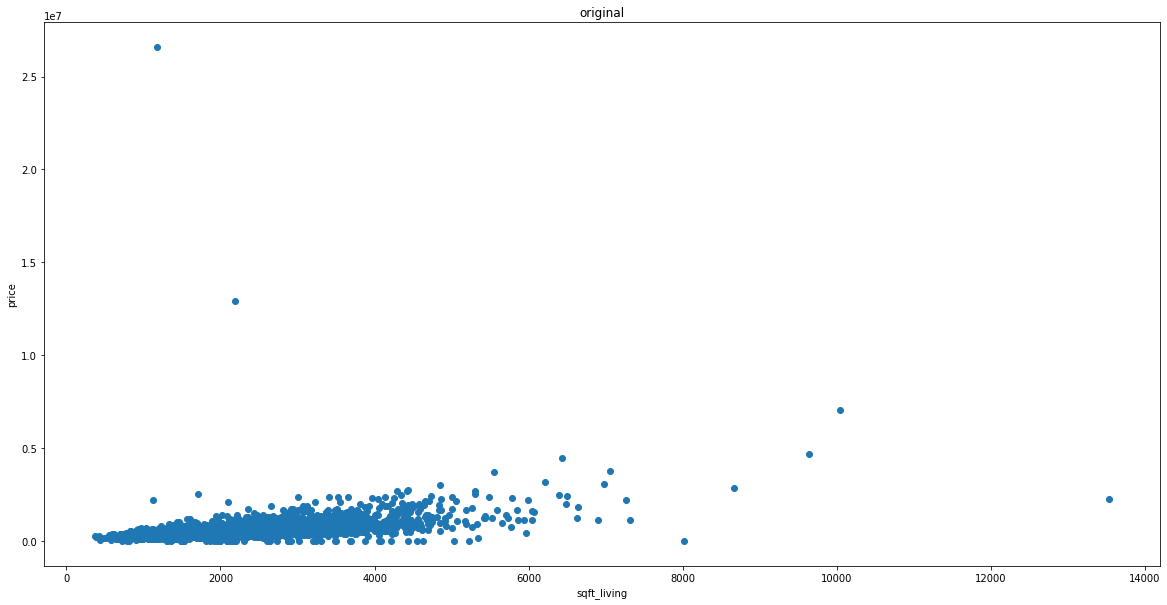

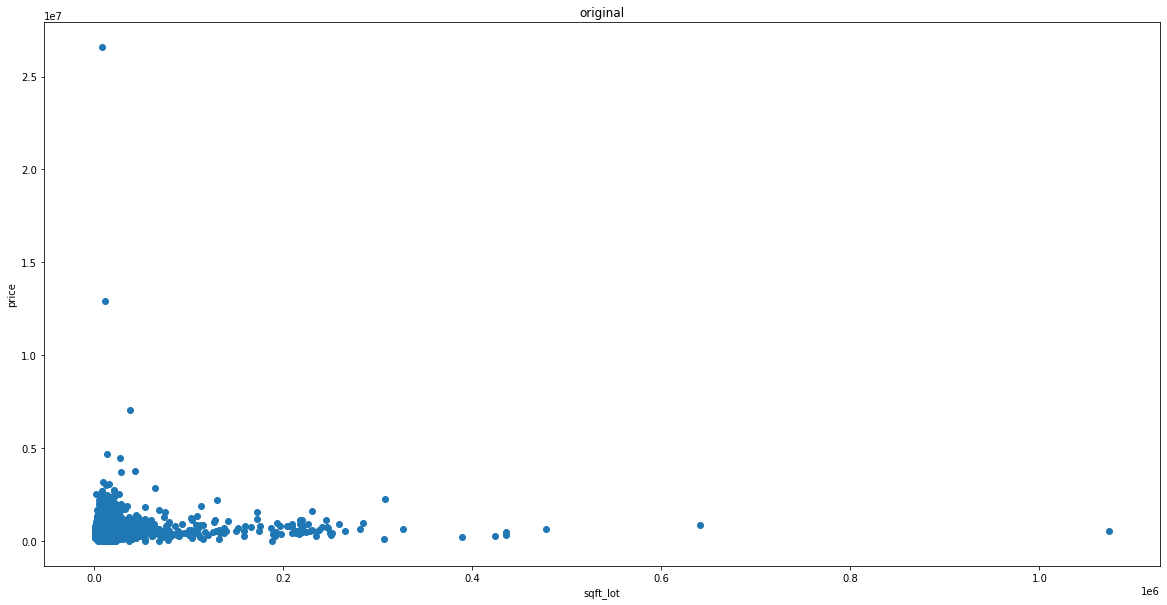

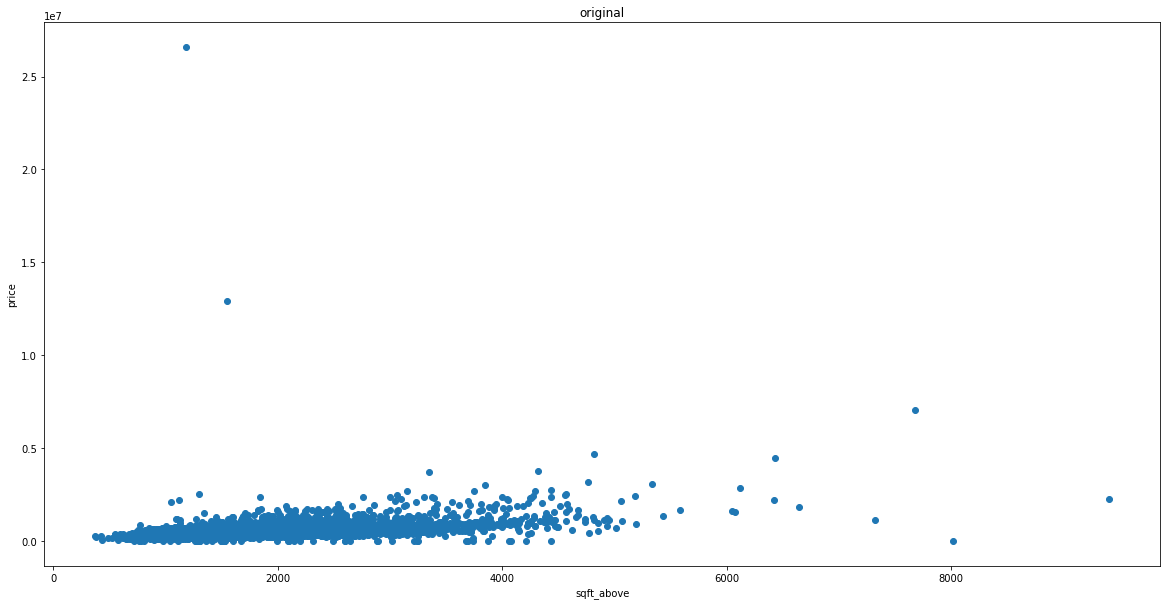

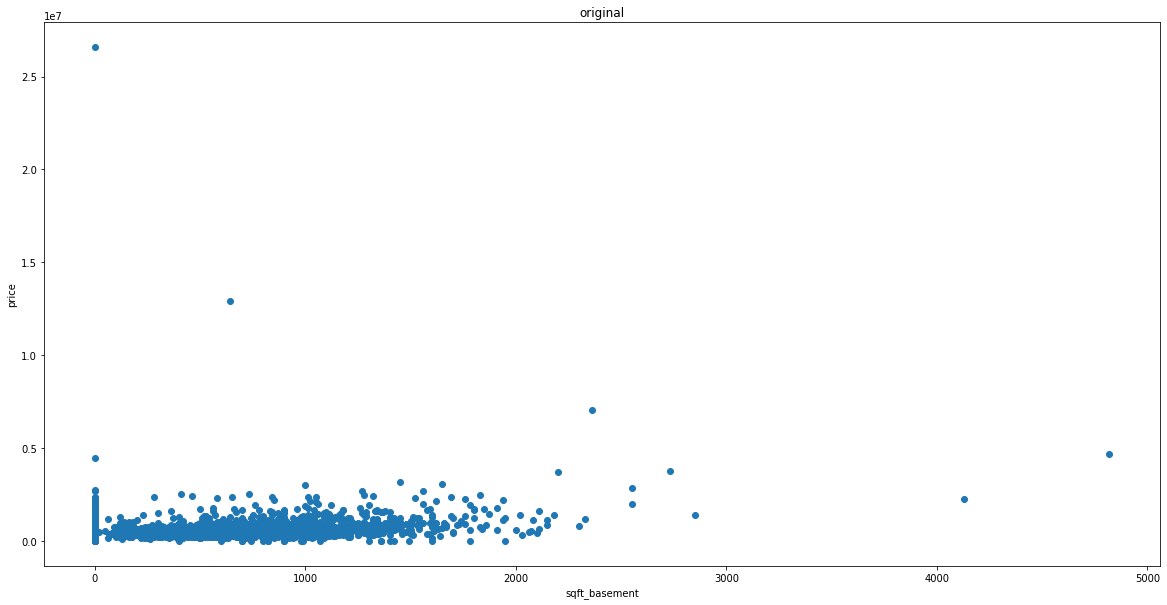

In [13]:
continuous_list = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]
# original_instances
price = housing.price.to_numpy()
for c in continuous_list:
    attrs = housing[c].to_numpy()
    plt.figure(figsize=(20,10))
    plt.scatter(attrs, price)
    plt.gca().set(title="original", ylabel='price', xlabel='{}'.format(c))
    plt.show()

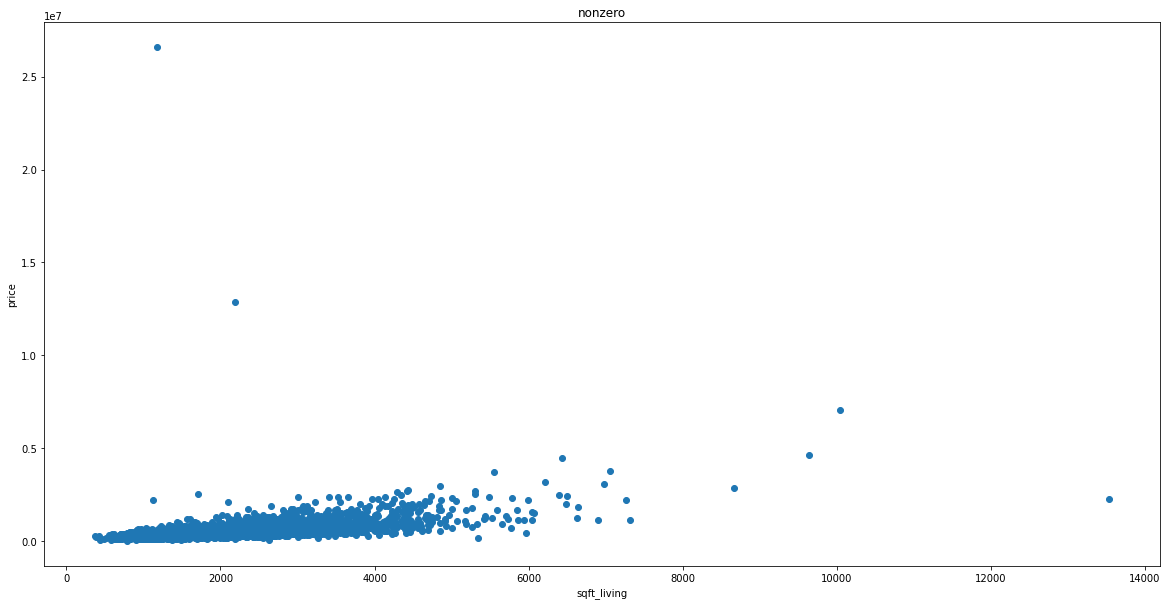

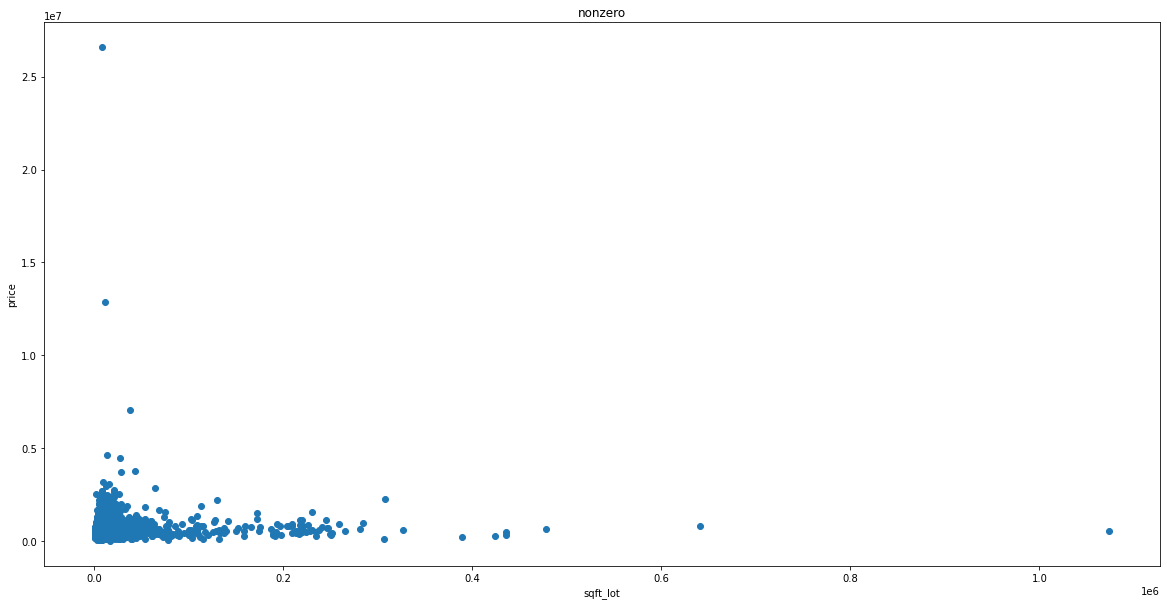

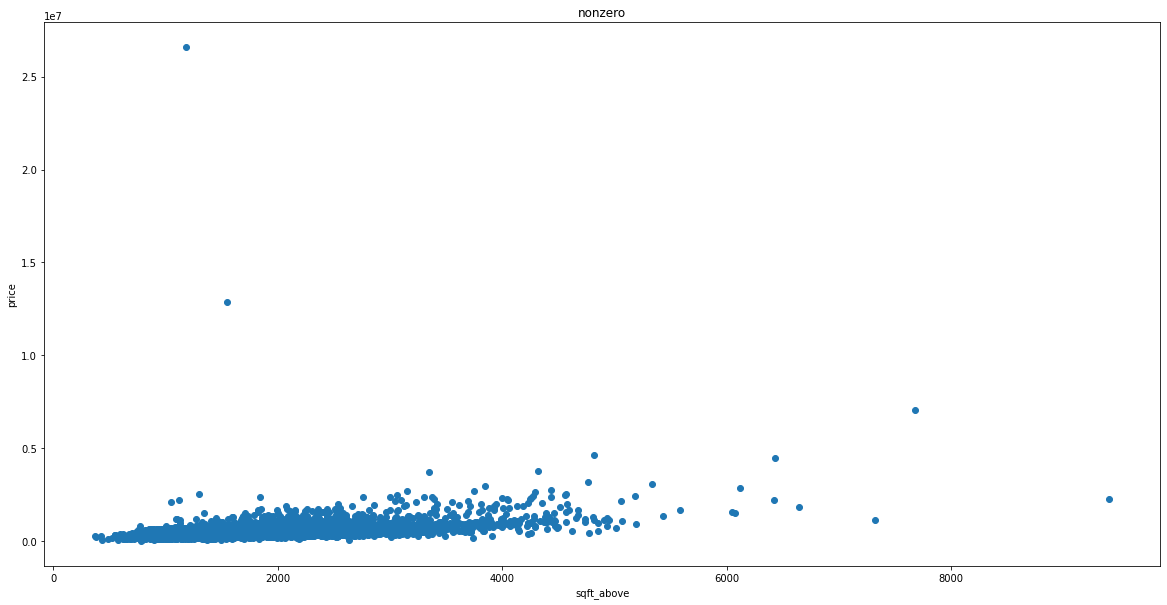

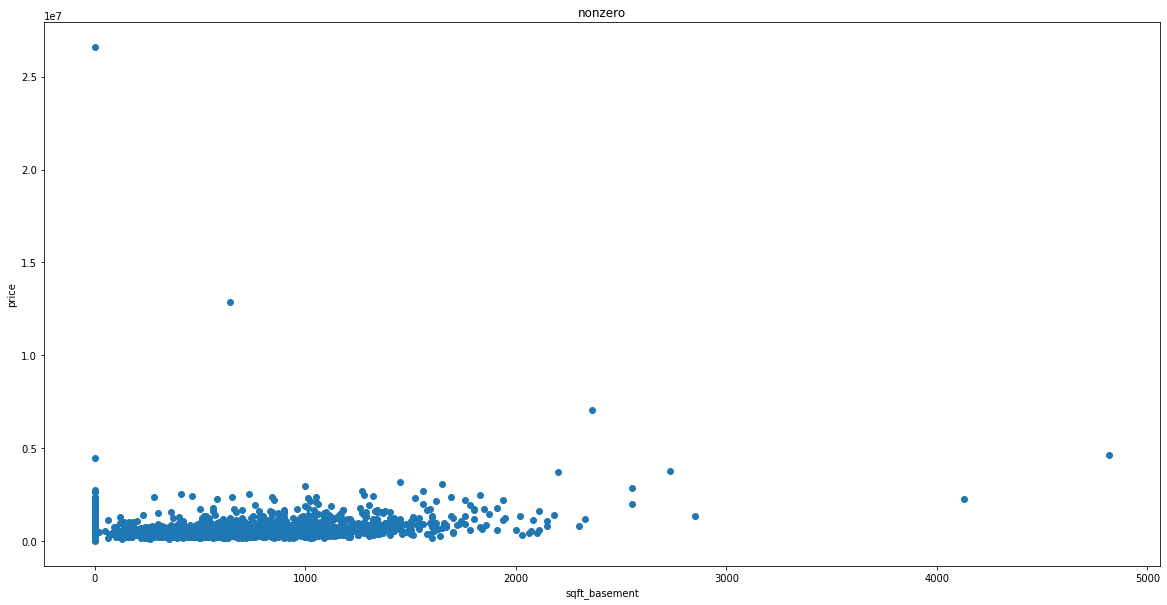

In [14]:
continuous_list = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]
# non_zero_instances
price = house_nonzero.price.to_numpy()
for c in continuous_list:
    attrs = house_nonzero[c].to_numpy()
    plt.figure(figsize=(20,10))
    plt.scatter(attrs, price)
    plt.gca().set(title="nonzero", ylabel='price', xlabel='{}'.format(c))
    plt.show()

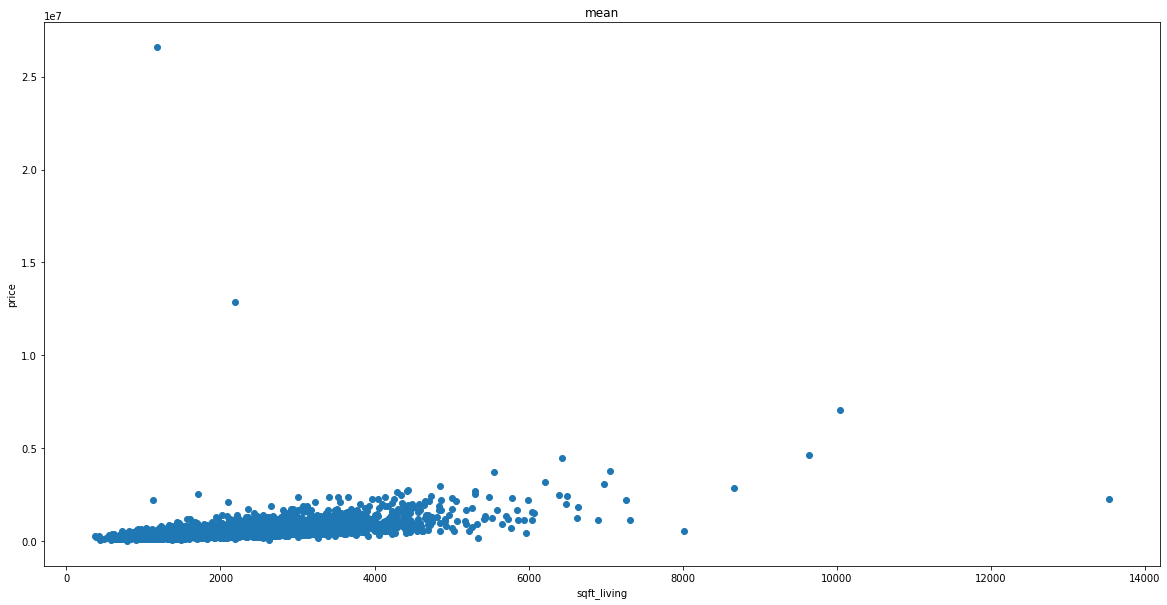

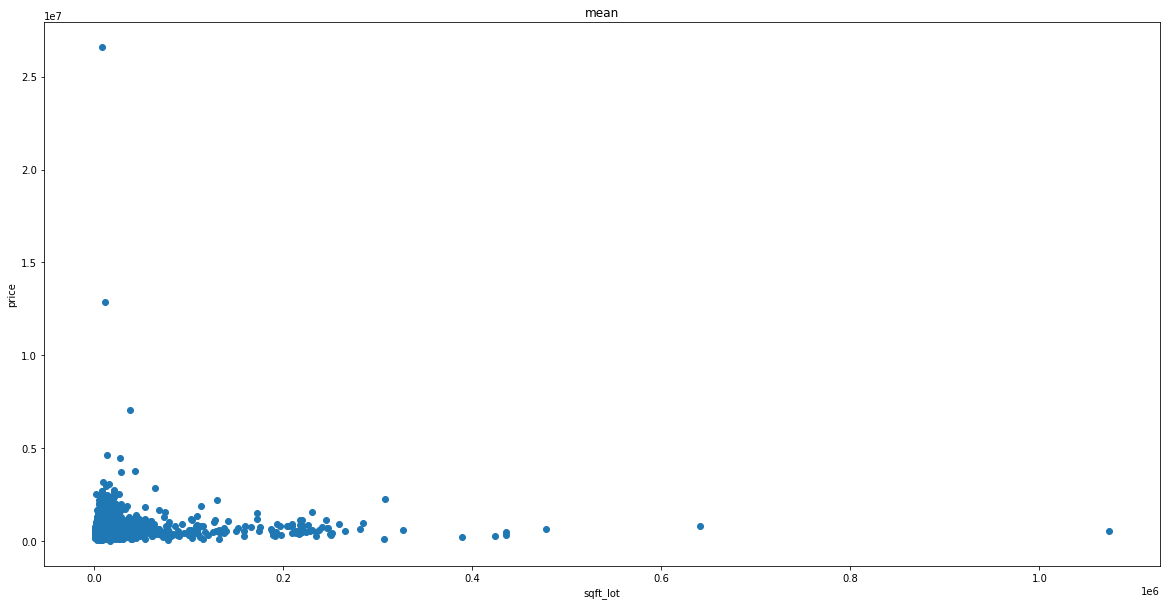

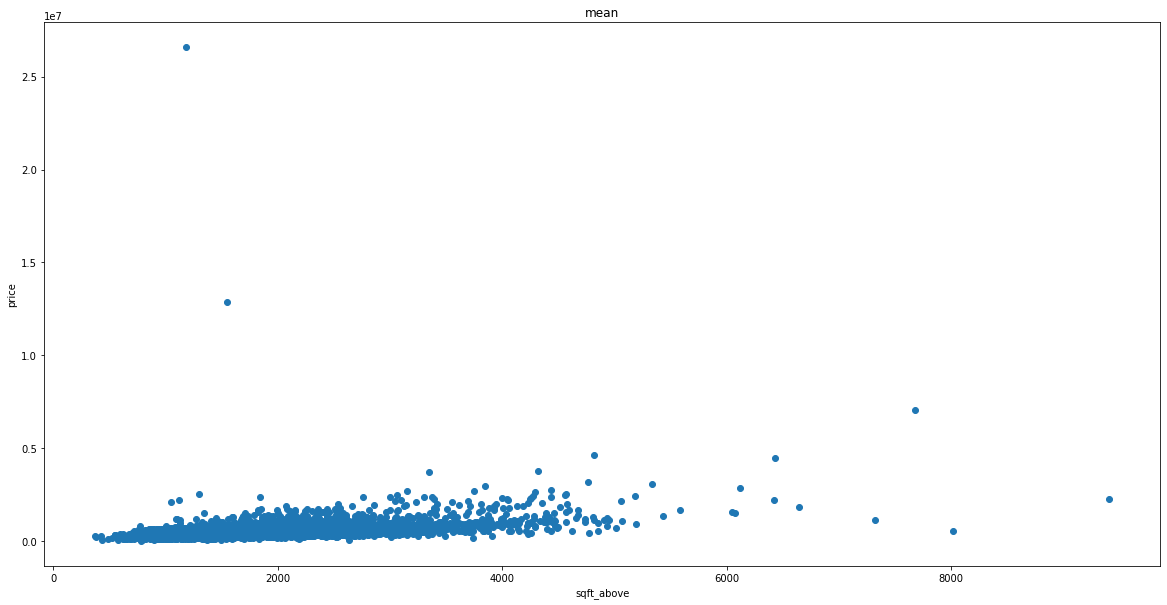

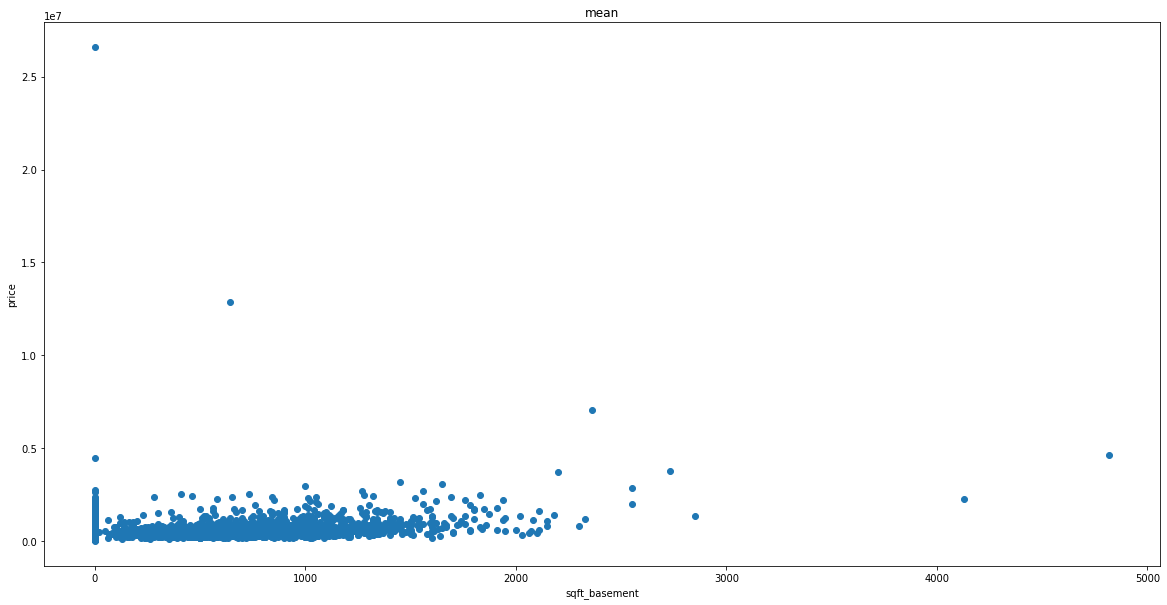

In [15]:
continuous_list = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]
# original_instances
price = housing_mean.price.to_numpy()
for c in continuous_list:
    attrs = housing_mean[c].to_numpy()
    plt.figure(figsize=(20,10))
    plt.scatter(attrs, price)
    plt.gca().set(title="mean", ylabel='price', xlabel='{}'.format(c))
    plt.show()

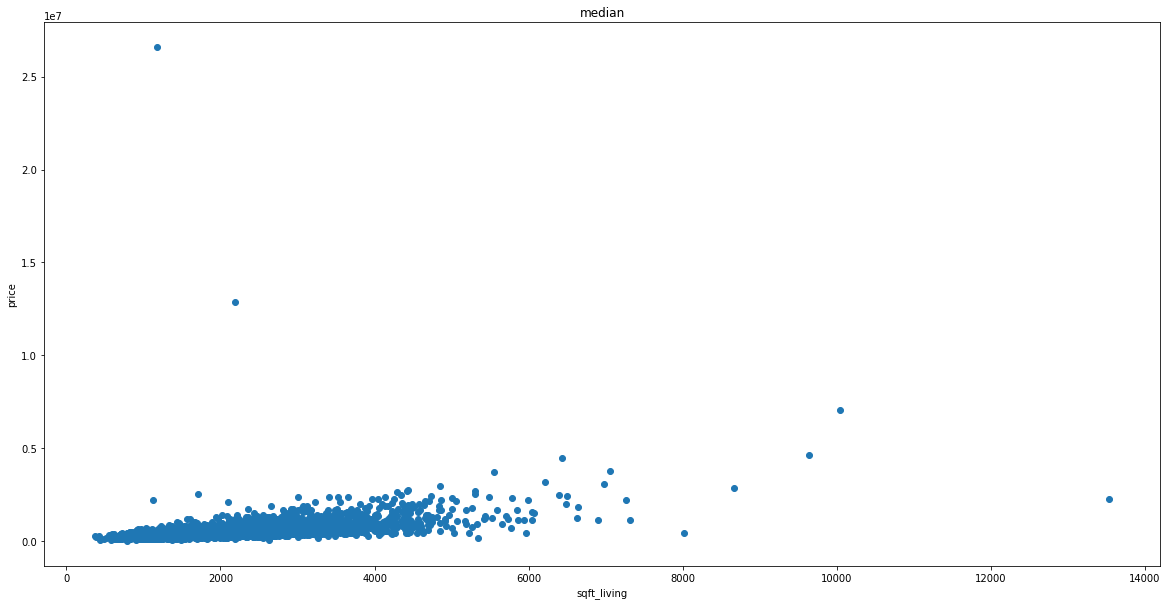

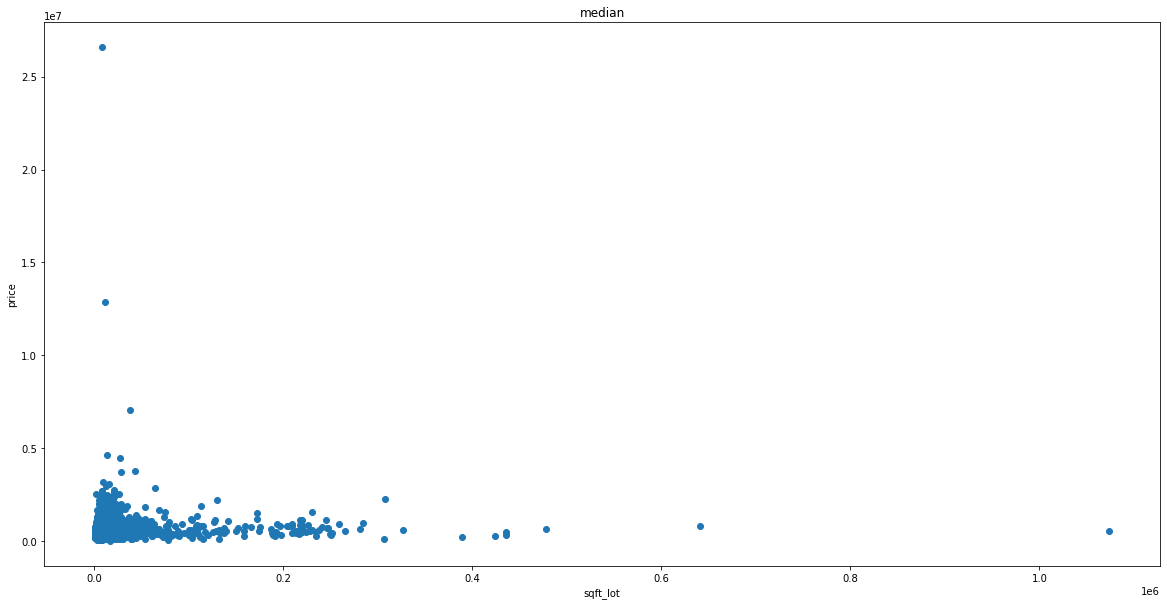

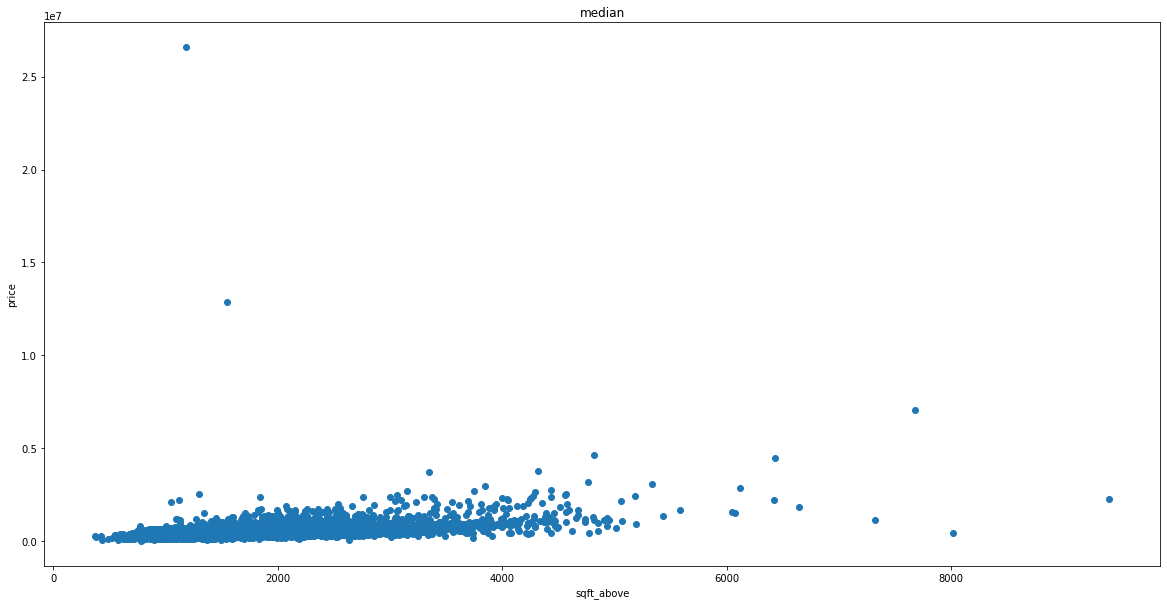

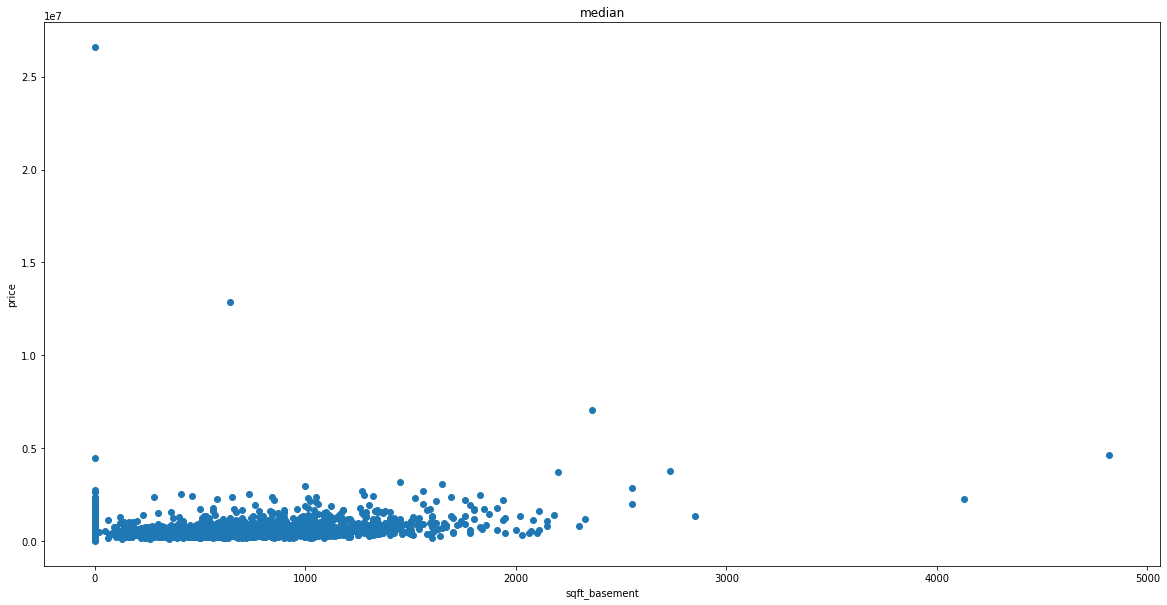

In [16]:
continuous_list = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]
# original_instances
price = housing_median.price.to_numpy()
for c in continuous_list:
    attrs = housing_median[c].to_numpy()
    plt.figure(figsize=(20,10))
    plt.scatter(attrs, price)
    plt.gca().set(title="median", ylabel='price', xlabel='{}'.format(c))
    plt.show()

sqft_living, sqft_above, sqft_basement seem to be linearly correlated with the target.

sqft_lot seems to have no correlation with target.

In [17]:
import math
def get_coeff(x, y):
    xy = np.multiply(x, y)
    xx = np.multiply(x, x)
    yy = np.multiply(y, y)
    mean_x, num = get_mean(x)
    mean_y, _ = get_mean(y)
    mean_xy, _ = get_mean(xy)
    mean_xx, _ = get_mean(xx)
    mean_yy, _ = get_mean(yy)
    
    sum_x = mean_x * num
    sum_y = mean_y * num
    sum_xy = mean_xy * num
    sum_xx = mean_xx * num
    sum_yy = mean_yy * num
    return (num * sum_xy - sum_x * sum_y) / math.sqrt((num * sum_xx - sum_x * sum_x)*(num * sum_yy - sum_y * sum_y))
    

In [18]:
# original
continuous_list = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]
price = housing.price.to_numpy()
for c in continuous_list:
    attrs = housing[c].to_numpy()
    print("original price-{} coeff: {}\n".format(c, get_coeff(price, attrs)))

original price-sqft_living coeff: 0.43497128298513676

original price-sqft_lot coeff: 0.05098595114373697

original price-sqft_above coeff: 0.3714649096144227

original price-sqft_basement coeff: 0.5851523327694369



In [19]:
# 0 removed
continuous_list = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]
price = house_nonzero.price.to_numpy()
for c in continuous_list:
    attrs = house_nonzero[c].to_numpy()
    print("0 removed price-{} coeff: {}\n".format(c, get_coeff(price, attrs)))

0 removed price-sqft_living coeff: 0.4454937084813821

0 removed price-sqft_lot coeff: 0.051347330073748254

0 removed price-sqft_above coeff: 0.3806609408842476

0 removed price-sqft_basement coeff: 0.5959613659050302



In [20]:
# median replaced
continuous_list = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]
price = housing_median.price.to_numpy()
for c in continuous_list:
    attrs = housing_median[c].to_numpy()
    print("median-replaced price-{} coeff: {}\n".format(c, get_coeff(price, attrs)))

median-replaced price-sqft_living coeff: 0.43851463193178064

median-replaced price-sqft_lot coeff: 0.05109954208047894

median-replaced price-sqft_above coeff: 0.37421749791188985

median-replaced price-sqft_basement coeff: 0.5883478538135515



In [21]:
# mean replaced
continuous_list = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]
price = housing_mean.price.to_numpy()
for c in continuous_list:
    attrs = housing_mean[c].to_numpy()
    print("mean-replaced price-{} coeff: {}\n".format(c, get_coeff(price, attrs)))

mean-replaced price-sqft_living coeff: 0.43977549019082635

mean-replaced price-sqft_lot coeff: 0.051186408955825775

mean-replaced price-sqft_above coeff: 0.3752390608821397

mean-replaced price-sqft_basement coeff: 0.5903163009864004



The result is consistent with my visual inspection.
The coefficients are the highest when 0 is removed from the set. 
Second highest is replaced with mean value. 
Third highest is median-replaced ones. 
And the original one has the smallest coefficients. So removing or replacing 0 values can help increase the correlation of variables and targets.

In [22]:
# One hot encoding
to_1hot = ['city', 'statezip', 'view']

housing = pandas.get_dummies(housing, columns=to_1hot, drop_first=True)
housing_mean = pandas.get_dummies(housing_mean, columns=to_1hot, drop_first=True)
housing_median = pandas.get_dummies(housing_median, columns=to_1hot, drop_first=True)
house_nonzero = pandas.get_dummies(house_nonzero, columns=to_1hot, drop_first=True);

**city, statezip,** and **view** attributes have been one-hot encoded. **City** and **statezip** are clearly nominal, so a one-hot encoding makes sense. It is not immediately obvious whether **view** is a rating of "how good is the view?" or some kind of view categorization. So, to be on the safe side, we can assume **view** is nominal and one-hot encode view as well.

It does not make sense to one-hot encode any continuous variables. The remaining categorical variables (**bedrooms, bathrooms, floors, condition, yr_built,** and **yr_renovated**) are all ordinal, so they do not need to be one-hot encoded.

In [23]:
from sklearn.preprocessing import MinMaxScaler

# min-max scaling
housing_minmax, housing_mean_minmax = housing.copy(), housing_mean.copy()
housing_median_minmax, house_nonzero_minmax = housing_median.copy(), house_nonzero.copy()
datasets = [housing_minmax, housing_mean_minmax, housing_median_minmax, house_nonzero_minmax]

to_scale = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','sqft_above','sqft_basement','yr_built','yr_renovated']
for dataset in datasets:
    for attr in to_scale:
        dataset[attr] = MinMaxScaler().fit_transform(dataset[attr].values.reshape(-1,1))
    print(dataset.describe())

             price     bedrooms  ...       view_3       view_4
count  4600.000000  4600.000000  ...  4600.000000  4600.000000
mean      0.020758     0.377874  ...     0.025217     0.015217
std       0.021205     0.100983  ...     0.156802     0.122430
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.012143     0.333333  ...     0.000000     0.000000
50%       0.017335     0.333333  ...     0.000000     0.000000
75%       0.024632     0.444444  ...     0.000000     0.000000
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 135 columns]
             price     bedrooms  ...       view_3       view_4
count  4600.000000  4600.000000  ...  4600.000000  4600.000000
mean      0.020695     0.377874  ...     0.025217     0.015217
std       0.021101     0.100983  ...     0.156802     0.122430
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.012052     0.333333  ...     0.000000     0.000000
50%       0.017341     0.333333

In [24]:
from sklearn.preprocessing import StandardScaler

# Standardization
housing_std, housing_mean_std = housing.copy(), housing_mean.copy()
housing_median_std, house_nonzero_std = housing_median.copy(), house_nonzero.copy()
datasets = [housing_std, housing_mean_std, housing_median_std, house_nonzero_std]

to_scale = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','sqft_above','sqft_basement','yr_built','yr_renovated']
for dataset in datasets:
    for attr in to_scale:
        dataset[attr] = StandardScaler().fit_transform(dataset[attr].values.reshape(-1,1))
    print(dataset.describe())

              price      bedrooms  ...       view_3       view_4
count  4.600000e+03  4.600000e+03  ...  4600.000000  4600.000000
mean   6.736158e-17  8.773175e-18  ...     0.025217     0.015217
std    1.000109e+00  1.000109e+00  ...     0.156802     0.122430
min   -9.790511e-01 -3.742363e+00  ...     0.000000     0.000000
25%   -4.063476e-01 -4.411223e-01  ...     0.000000     0.000000
50%   -1.614470e-01 -4.411223e-01  ...     0.000000     0.000000
75%    1.826966e-01  6.592912e-01  ...     0.000000     0.000000
max    4.618529e+01  6.161359e+00  ...     1.000000     1.000000

[8 rows x 135 columns]
              price      bedrooms  ...       view_3       view_4
count  4.600000e+03  4.600000e+03  ...  4600.000000  4600.000000
mean   1.141358e-16  8.773175e-18  ...     0.025217     0.015217
std    1.000109e+00  1.000109e+00  ...     0.156802     0.122430
min   -9.808315e-01 -3.742363e+00  ...     0.000000     0.000000
25%   -4.096358e-01 -4.411223e-01  ...     0.000000     0.000000
5

In [25]:
# Mean absolute error
def MAE(y, y_pred):
    return sum(map(lambda a,b: abs(a-b), y, y_pred)) / len(y)

# Mean squared error
def MSE(y, y_pred):
    return sum(map(lambda a,b: (a-b)**2, y, y_pred)) / len(y)

In [26]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

datasets = [(housing_minmax, "Original, Min-Max"), (housing_mean_minmax, "Mean replaced, Min-Max"),
            (housing_median_minmax, "Median replaced, Min-Max"), (house_nonzero_minmax, "Nonzero, Min-Max"),
            (housing_std, "Original, Standard"), (housing_mean_std, "Mean replaced, Standard"),
            (housing_median_std, "Median replaced, Standard"), (house_nonzero_std, "Nonzero, Standard")]

# Creat KFold splits, train, and test LinReg classifier
for dataset, title in datasets:
    print("\n"+title+":")
    kf = KFold(n_splits=10, shuffle=True, random_state=2)
    X = dataset.iloc[:,1:].values
    y = dataset.price.values
    fold = 1
    for train_i, test_i in kf.split(X):
        print("  Fold {}:".format(fold))
        fold += 1
        X_train, X_test = X[train_i], X[test_i]
        y_train, y_test = y[train_i], y[test_i]
        reg = LinearRegression().fit(X_train, y_train)
        y_pred = reg.predict(X_test)
          
        print("    MAE: {}".format(MAE(y_test, y_pred)))
        print("    MSE: {}".format(MSE(y_test, y_pred)))


Original, Min-Max:
  Fold 1:
    MAE: 103347.81490399598
    MSE: 4913154231012.239
  Fold 2:
    MAE: 0.0069026320603698945
    MSE: 0.002231085474228012
  Fold 3:
    MAE: 0.004558624638315799
    MSE: 6.237050895607248e-05
  Fold 4:
    MAE: 0.0043062566346048934
    MSE: 4.907261672458952e-05
  Fold 5:
    MAE: 0.0051867723011302025
    MSE: 0.0004973808575585824
  Fold 6:
    MAE: 23984980.58121235
    MSE: 1.7166460630568403e+17
  Fold 7:
    MAE: 6919834.735912275
    MSE: 2.202669184967759e+16
  Fold 8:
    MAE: 0.005178682939869319
    MSE: 0.00011827784189332
  Fold 9:
    MAE: 0.004428844726165422
    MSE: 5.983004449026017e-05
  Fold 10:
    MAE: 0.004250245947493368
    MSE: 9.587687881860552e-05

Mean replaced, Min-Max:
  Fold 1:
    MAE: 97752.33094261042
    MSE: 4395538047895.827
  Fold 2:
    MAE: 0.0065635911443359
    MSE: 0.002212529038683855
  Fold 3:
    MAE: 0.004292249895560793
    MSE: 5.1375946290113267e-05
  Fold 4:
    MAE: 0.004110010288482182
    MSE: 4.

On most folds, the linear regression classifier performed with a reasonably low MAE and MSE. On average, the linear regression classifier did bettwer with the min-max normalized dataset than the standardized dataset. Additionally, the model behaves best when using only the nonzero prices, which aligns with what we saw when ivestigating the correlation coefficients.

On some folds, the LinReg classifier has horribly large errors. The model is predicting a few nonsense values for the 'price', which throws off the models MSE and MAE. Most likely this is due to our **city** and **statezip** attributes. Since there are so many categories for city and statezip, we end up with a large number of attributes. Too many features can cause overfitting issues. Fortunately, using 10-fold cross validation, we are able to notice the overfitting that occurs when training the LinReg classifier. Out of curiosity, we evaluated our model when dropping the **city** and **statezip** features, and it performed much better. Proper features selection could improve our results.

## References
* https://www.tutorialspoint.com/python_pandas/ and https://pandas.pydata.org/pandas-docs/stable/user_guide/ for description of pandas dataframes
* https://matplotlib.org/stable/api/ for matplotlib docs
* https://scikit-learn.org/ for scikit docs